# DATA SET INFORMATION #

Data kunjungan website Kuncie yang ditarik selama periode 1 Februari 2023-31 Maret 2023.
Data yang disediakan merupakan data event tracker “page impression” yang dikirim ketika user mengunjungi website Kuncie.
Dalam data tersebut terdapat informasi mengenai waktu, halaman yang dikunjungi dan referrer (dari mana user datang sebelum mengunjungi halaman Kuncie).

Data yang disediakan merupakan data mentah yang mungkin masih memerlukan proses cleaning dan transformasi sesuai kebutuhan analisa yang dilakukan.


# Import Library#

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

# Load Data#

In [404]:
df = pd.read_csv('web_page_impression.csv', on_bad_lines = 'skip')
df.head ()

,id,page_referrer,page_url,kuncie_user_id,timestamp,visitor_id;;;;
0,2c50a3a5-5385-4c54-9682-04b57f0d0458,/premium/login/,https://www.kuncie.com/premium/login,95,2022-09-19 07:45:23.977000 UTC,2262;;;;
1,22132c6c-169d-46e9-a2d3-d0ecbee9a022,/premium/login/,https://www.kuncie.com/premium/login,95,2022-09-19 04:48:52.648000 UTC,539;;;;
2,3c769ab9-239a-4e27-94ba-1d3b50dea61a,/premium/login/,https://www.kuncie.com/premium/login,95,2022-09-19 10:30:55.521000 UTC,9451;;;;
3,71ec45a1-85ac-4300-b7db-de9ecedd4e26,https://www.kuncie.com/premium/my-account/,https://www.kuncie.com/premium/my-account/edit...,940,2022-07-24 22:45:27.757000 UTC,4199;;;;
4,cc2d26e9-675b-4f7b-9152-b4762c990d22,https://www.kuncie.com/premium/my-account/,https://www.kuncie.com/premium/premium/kelas/k...,NaN,2022-11-11 04:14:20.635000 UTC,5318;;;;


In [405]:
df = df.rename(columns = {'timestamp': 'date'})
df.head ()

,id,page_referrer,page_url,kuncie_user_id,date,visitor_id;;;;
0,2c50a3a5-5385-4c54-9682-04b57f0d0458,/premium/login/,https://www.kuncie.com/premium/login,95,2022-09-19 07:45:23.977000 UTC,2262;;;;
1,22132c6c-169d-46e9-a2d3-d0ecbee9a022,/premium/login/,https://www.kuncie.com/premium/login,95,2022-09-19 04:48:52.648000 UTC,539;;;;
2,3c769ab9-239a-4e27-94ba-1d3b50dea61a,/premium/login/,https://www.kuncie.com/premium/login,95,2022-09-19 10:30:55.521000 UTC,9451;;;;
3,71ec45a1-85ac-4300-b7db-de9ecedd4e26,https://www.kuncie.com/premium/my-account/,https://www.kuncie.com/premium/my-account/edit...,940,2022-07-24 22:45:27.757000 UTC,4199;;;;
4,cc2d26e9-675b-4f7b-9152-b4762c990d22,https://www.kuncie.com/premium/my-account/,https://www.kuncie.com/premium/premium/kelas/k...,NaN,2022-11-11 04:14:20.635000 UTC,5318;;;;


In [406]:
df = df.rename(columns = {'visitor_id;;;;': 'visitor_id'})
df.head ()

,id,page_referrer,page_url,kuncie_user_id,date,visitor_id
0,2c50a3a5-5385-4c54-9682-04b57f0d0458,/premium/login/,https://www.kuncie.com/premium/login,95,2022-09-19 07:45:23.977000 UTC,2262;;;;
1,22132c6c-169d-46e9-a2d3-d0ecbee9a022,/premium/login/,https://www.kuncie.com/premium/login,95,2022-09-19 04:48:52.648000 UTC,539;;;;
2,3c769ab9-239a-4e27-94ba-1d3b50dea61a,/premium/login/,https://www.kuncie.com/premium/login,95,2022-09-19 10:30:55.521000 UTC,9451;;;;
3,71ec45a1-85ac-4300-b7db-de9ecedd4e26,https://www.kuncie.com/premium/my-account/,https://www.kuncie.com/premium/my-account/edit...,940,2022-07-24 22:45:27.757000 UTC,4199;;;;
4,cc2d26e9-675b-4f7b-9152-b4762c990d22,https://www.kuncie.com/premium/my-account/,https://www.kuncie.com/premium/premium/kelas/k...,NaN,2022-11-11 04:14:20.635000 UTC,5318;;;;


In [407]:
print(df.dtypes)

id                object
page_referrer     object
page_url          object
kuncie_user_id    object
date              object
visitor_id        object
dtype: object


In [408]:
df.describe()

,id,page_referrer,page_url,kuncie_user_id,date,visitor_id
count,28294,28032,28032,25527,28030,28026
unique,28271,9893,8978,1221,28004,16195
top,5867a8e4-95fd-4493-a218-61a655728d95,https://www.kuncie.com/premium/my-account/,https://www.kuncie.com/premium/cart,0,"b1ae824a-0123-4c20-a4ae-45e3ecbe6067"";;",;;;;
freq,2,803,2093,21494,3,1619


In [409]:
df.nunique()

id                28271
page_referrer      9893
page_url           8978
kuncie_user_id     1221
date              28004
visitor_id        16195
dtype: int64

In [410]:
df.isnull().sum()

id                   0
page_referrer      262
page_url           262
kuncie_user_id    2767
date               264
visitor_id         268
dtype: int64

# Missing Value#

In [411]:
nan_data= df[df.isna().any(axis=1)]
nan_data

,id,page_referrer,page_url,kuncie_user_id,date,visitor_id
4,cc2d26e9-675b-4f7b-9152-b4762c990d22,https://www.kuncie.com/premium/my-account/,https://www.kuncie.com/premium/premium/kelas/k...,NaN,2022-11-11 04:14:20.635000 UTC,5318;;;;
5,1395f16e-4ae4-4c73-ac50-440158986e1f,https://www.kuncie.com/premium/kelas/kuncie-x-...,https://www.kuncie.com/premium/premium/kelas/k...,NaN,2022-11-03 16:22:08.011000 UTC,8763;;;;
13,2026d282-8372-47fc-a643-88255764fa18,https://www.kuncie.com/premium/kelas/kuncie-x-...,https://www.kuncie.com/premium/premium/kelas/k...,NaN,2022-12-27 16:36:50.111000 UTC,8206;;;;
14,9ac0be34-6727-4a93-b739-9ec3da14989a,https://www.kuncie.com/premium/kelas/kuncie-x-...,https://www.kuncie.com/premium/premium/kelas/k...,NaN,2022-11-05 05:56:29.864000 UTC,4383;;;;
17,62d8ced5-028d-4d24-becb-56bf7effba5a,https://www.kuncie.com/premium/kelas/kuncie-x-...,https://www.kuncie.com/premium/premium/kelas/k...,NaN,2022-11-05 10:29:23.967000 UTC,6915;;;;
...,...,...,...,...,...,...
28243,8deb2320-eb6d-4f98-96a2-2b4b0b54be58,https://www.kuncie.com/premium/kelas/kuncie-x-...,https://www.kuncie.com/premium/premium/kelas/k...,NaN,2023-01-03 00:41:41.317000 UTC,6197;;;;
28247,"9b37093c-77f2-4490-8a32-f77f8e40389d,https://w...",NaN,NaN,NaN,NaN,NaN
28277,3c6774ab-ba40-42c2-9502-199248f7fdff,https://www.kuncie.com/premium/kelas/dasar-men...,https://www.kuncie.com/premium/premium/kelas/d...,NaN,2022-12-09 06:23:22.309000 UTC,9986;;;;
28282,45d9ec6f-b58a-4fcc-90f6-b21dc2b5287f,https://www.kuncie.com/premium/kelas/kuncie-x-...,https://www.kuncie.com/premium/premium/kelas/k...,NaN,2022-12-23 07:41:28.280000 UTC,3353;;;;


In [412]:
df=df.dropna()
df.head ()

,id,page_referrer,page_url,kuncie_user_id,date,visitor_id
0,2c50a3a5-5385-4c54-9682-04b57f0d0458,/premium/login/,https://www.kuncie.com/premium/login,95,2022-09-19 07:45:23.977000 UTC,2262;;;;
1,22132c6c-169d-46e9-a2d3-d0ecbee9a022,/premium/login/,https://www.kuncie.com/premium/login,95,2022-09-19 04:48:52.648000 UTC,539;;;;
2,3c769ab9-239a-4e27-94ba-1d3b50dea61a,/premium/login/,https://www.kuncie.com/premium/login,95,2022-09-19 10:30:55.521000 UTC,9451;;;;
3,71ec45a1-85ac-4300-b7db-de9ecedd4e26,https://www.kuncie.com/premium/my-account/,https://www.kuncie.com/premium/my-account/edit...,940,2022-07-24 22:45:27.757000 UTC,4199;;;;
6,67fecf75-69d3-4e8e-95f1-84f12e99a8cf,https://www.kuncie.com/premium/kelas/redeem-vo...,https://www.kuncie.com/premium/kelas/redeem-vo...,1120,2022-09-20 14:25:58.854000 UTC,941;;;;


In [413]:
df.isnull().sum()

id                0
page_referrer     0
page_url          0
kuncie_user_id    0
date              0
visitor_id        0
dtype: int64

# Konversi Tipe Data Date#

In [425]:
df['date'] = pd.to_datetime(df['date'])

In [439]:
df['date']

0       2022-09-19 07:45:23.977000+00:00
1       2022-09-19 04:48:52.648000+00:00
2       2022-09-19 10:30:55.521000+00:00
3       2022-07-24 22:45:27.757000+00:00
6       2022-09-20 14:25:58.854000+00:00
                      ...               
28289   2022-09-30 10:25:58.861000+00:00
28290   2022-08-27 15:07:30.956000+00:00
28291   2023-01-31 02:20:21.020000+00:00
28292   2022-08-12 22:10:17.125000+00:00
28293   2023-01-07 03:27:13.275000+00:00
Name: date, Length: 25521, dtype: datetime64[ns, UTC]

In [427]:
df['date'].value_counts()

2023-02-05 23:52:42.900000+00:00    2
2023-02-03 23:26:39.436000+00:00    2
2023-03-26 20:34:23.677000+00:00    2
2023-02-05 21:37:16.511000+00:00    2
2023-02-03 19:15:05.876000+00:00    2
                                   ..
2022-11-29 01:55:58.740000+00:00    1
2022-08-02 08:55:53.372000+00:00    1
2022-11-29 09:11:48.912000+00:00    1
2023-03-29 06:02:51.941000+00:00    1
2023-01-07 03:27:13.275000+00:00    1
Name: date, Length: 25503, dtype: int64

In [418]:
df['page_referrer'].value_counts()

https://lifestyle.haluan.co/                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               555
https://www.kuncie.com/premium/my-account/                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [419]:
df['page_url'].value_counts()

https://www.kuncie.com/premium/cart                                                                                                                                                                                                                     2093
https://www.kuncie.com/premium/premium/cart/                                                                                                                                                                                                            1702
https://www.kuncie.com/premium/login                                                                                                                                                                                                                     863
https://www.kuncie.com/premium/kelas                                                                                                                                                                                                             

In [429]:
df['visitor_id'] = pd.to_numeric(df['visitor_id'], errors='coerce').fillna(0).astype(int)
df['kuncie_user_id'] = pd.to_numeric(df['kuncie_user_id'], errors='coerce').fillna(0).astype(int)

In [430]:
print (df.dtypes)

id                             object
page_referrer                  object
page_url                       object
kuncie_user_id                  int32
date              datetime64[ns, UTC]
visitor_id                      int32
dtype: object


In [431]:
df['page_referrer'].value_counts()

https://lifestyle.haluan.co/                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               555
https://www.kuncie.com/premium/my-account/                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [434]:
top10 = df['page_referrer'].value_counts().nlargest(10)
top10

https://lifestyle.haluan.co/                                    555
https://www.kuncie.com/premium/my-account/                      533
https://www.kuncie.com                                          513
/premium/login/                                                 356
https://www.kuncie.com/premium/mini-mba/                        350
https://bahasa.newsbytesapp.com/                                342
https://www.kilat.com/                                          311
https://lm.facebook.com/                                        297
https://www.kuncie.com/premium/login/?action=forgot-password    279
https://linktr.ee/                                              264
Name: page_referrer, dtype: int64

In [ ]:
df['kuncie_user_id'].value_counts()
df['kuncie_user_id']

In [ ]:
web_daily_visits = df.groupby('date').count()['visitor_id']

In [ ]:
web_daily_visits

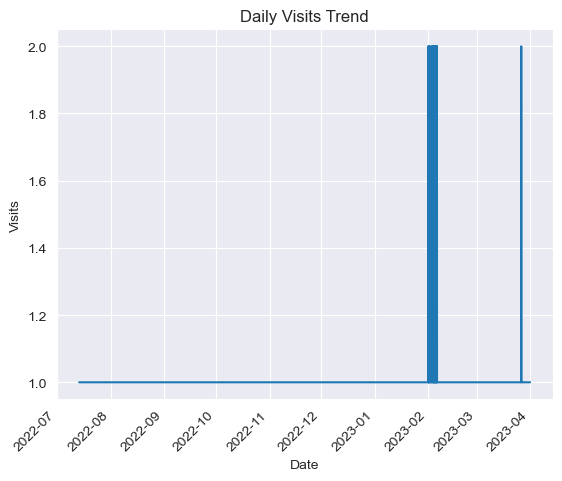

In [445]:
plt.plot(web_daily_visits.index, web_daily_visits.values)
plt.title('Daily Visits Trend')
plt.xlabel('Date')
plt.ylabel('Visits')
plt.xticks(rotation=45, ha='right')
plt.show()